
## How to Use the Notebooks

To run these notebooks, follow these steps:


### 1. Install **`gdal`** Package
Installing `gdal` via `pip` may fail. Therefore, we recommend using conda to install it:
```bash
conda install gdal -c conda-forge
```

### 2. Install **`polsartools`** Package

Before running the notebooks, you'll need to install the core **`polsartools`** package. 

**Option A:** Install from PyPI `pip` (stable release)

```bash
pip install polsartools
```

**Option B:** Install from conda (stable release)

```bash
conda install polsartools -c bnarayanarao
```


**Option C:**  Install the latest version from GitHub (if you need recent updates or fixes)

```bash
pip install git+https://github.com/Narayana-Rao/polsartools.git#egg=polsartools
```
> **Note:** If you encounter a `"module not found"` error or require newer features, prefer the **Option C**.

### 3. Verify the Installation

After successfully installing `polsartools`, you can verify it by importing the package:

```bash
import polsartools as pst
```

If this runs without errors, you're ready to explore and run the notebooks.




In [1]:
import polsartools as pst
import os
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:

def read_rst(file):
    ds = gdal.Open(file)
    band = ds.GetRasterBand(1)
    arr = band.ReadAsArray()
    arr[arr==0] = np.nan
    return arr


def plot_images(*filenames, lower_percentile=2, upper_percentile=98, max_cols=4):
    # Function to compute vmin and vmax based on nanpercentiles
    def compute_vmin_vmax(data):
        data_no_nan = data[np.isfinite(data)]  # Remove NaNs
        vmin = np.percentile(data_no_nan, lower_percentile)
        vmax = np.percentile(data_no_nan, upper_percentile)
        return vmin, vmax
    
    # Number of images to plot
    num_images = len(filenames)

    # Calculate the number of rows and columns
    ncols = min(max_cols, num_images)  # Use max_cols but limit it to num_images
    nrows = np.ceil(num_images / ncols).astype(int)  # Calculate number of rows

    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.flatten() 

    for i, filename in enumerate(filenames):
        data = read_rst(filename)  # Load the data from the file
        vmin, vmax = compute_vmin_vmax(data)
        ax = axes[i]
        im = ax.imshow(data, vmin=vmin, vmax=vmax)
        ax.set_title(os.path.basename(filename))
        fig.colorbar(im, ax=ax)

    # Turn off any unused axes
    for j in range(num_images, len(axes)):
        axes[j].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

#### 1. Extract multilooked C4/C3/T4/T3 matrix from NISAR full-pol GSLC data
##### using **`polsartools.nisar_gslc`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/sensors/nisar.html#gslc-nisar-gslc) or run `print(polsartools.nisar_gslc.__.doc__)`


In [ ]:
"""
The following function extracts single looked S2 or multilooked C4/C3/T4/T3 matrix from NISAR full-polarimetric GSLC data. 

Provide path to the NISAR GSLC .h5 file.
"""

inFile =r"GSLC_QP.h5"

pst.nisar_gslc(inFile,azlks=2,rglks=2,matrixType='C3')


Detected L-band ['HH' 'HV' 'VV' 'VH'] 
Extracting C3 matrix elements...
Saved file .\GSLC_QP\C3/C11.bin
Saved file .\GSLC_QP\C3/C22.bin
Saved file .\GSLC_QP\C3/C33.bin
Saved file .\GSLC_QP\C3/C12_real.bin
Saved file .\GSLC_QP\C3/C12_imag.bin
Saved file .\GSLC_QP\C3/C13_real.bin
Saved file .\GSLC_QP\C3/C13_imag.bin
Saved file .\GSLC_QP\C3/C23_real.bin
Saved file .\GSLC_QP\C3/C23_imag.bin
Execution time for nisar_gslc: 4.00 seconds


#### 2. Speckle filtering using polarimetric refined-Lee filter (optional)

In [4]:

C3Folder = os.path.join(inFile.split('.h5')[0],'C3')
window_size = 3
pst.rlee(C3Folder,window_size=window_size)

Progress : 100%|█████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  2.20 block/s]


Saved file GSLC_QP_rlee_3x3\C3\C11.bin
Saved file GSLC_QP_rlee_3x3\C3\C12_real.bin
Saved file GSLC_QP_rlee_3x3\C3\C12_imag.bin
Saved file GSLC_QP_rlee_3x3\C3\C13_real.bin
Saved file GSLC_QP_rlee_3x3\C3\C13_imag.bin
Saved file GSLC_QP_rlee_3x3\C3\C22.bin
Saved file GSLC_QP_rlee_3x3\C3\C23_real.bin
Saved file GSLC_QP_rlee_3x3\C3\C23_imag.bin
Saved file GSLC_QP_rlee_3x3\C3\C33.bin
Execution time for rlee: 6.00 seconds


#### 3. Generate a quick look Pauli RGB from the extracted matrix (optional)

GSLC_QP\C3
Pauli RGB image saved as GSLC_QP_rlee_3x3\C3\PauliRGB.png
Execution time for pauliRGB: 1.00 seconds


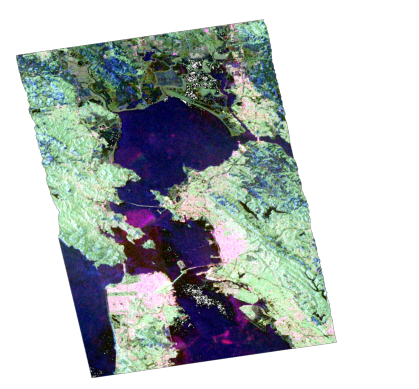

In [5]:
print(C3Folder)
C3Folder = os.path.join(inFile.split('.h5')[0]+f'_rlee_{window_size}x{window_size}','C3')
pst.utils.pauliRGB(C3Folder)

#### 4. Generating Decomposition parameters

#### 4.1. Generate H/A/α Decomposition parameters

Progress : 100%|█████████████████████████████████████████████████████████████████████| 9/9 [00:06<00:00,  1.36 block/s]


Saved file GSLC_QP_rlee_3x3\C3\H_fp.tif
Saved file GSLC_QP_rlee_3x3\C3\alpha_fp.tif
Saved file GSLC_QP_rlee_3x3\C3\anisotropy_fp.tif
Saved file GSLC_QP_rlee_3x3\C3\e1_norm.tif
Saved file GSLC_QP_rlee_3x3\C3\e2_norm.tif
Saved file GSLC_QP_rlee_3x3\C3\e3_norm.tif
Execution time for halphafp: 8.00 seconds


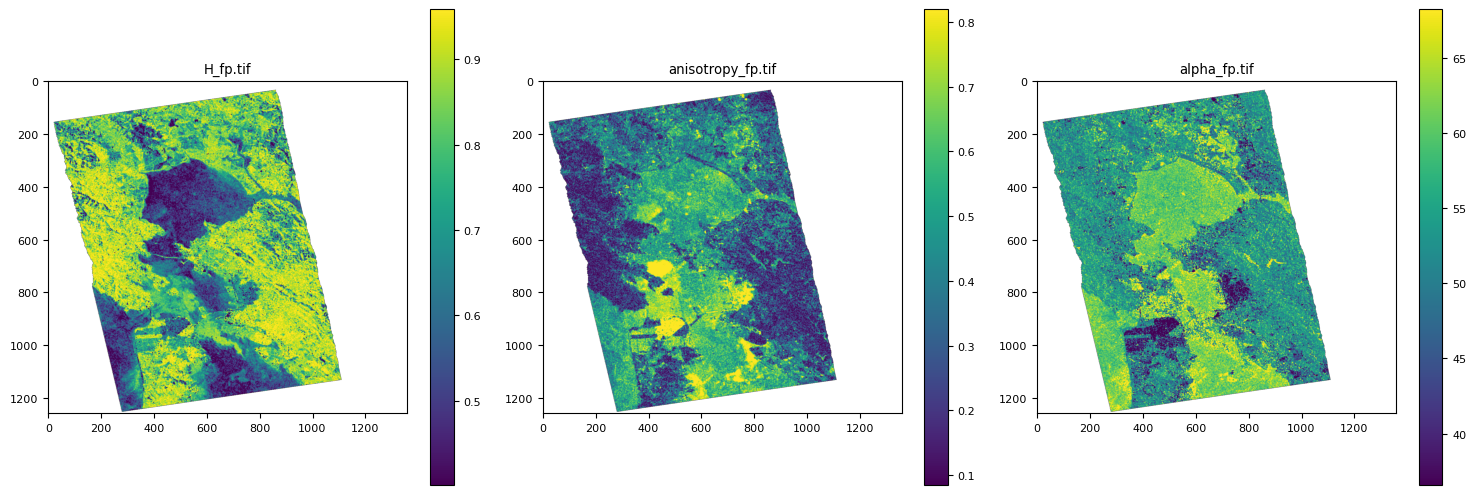

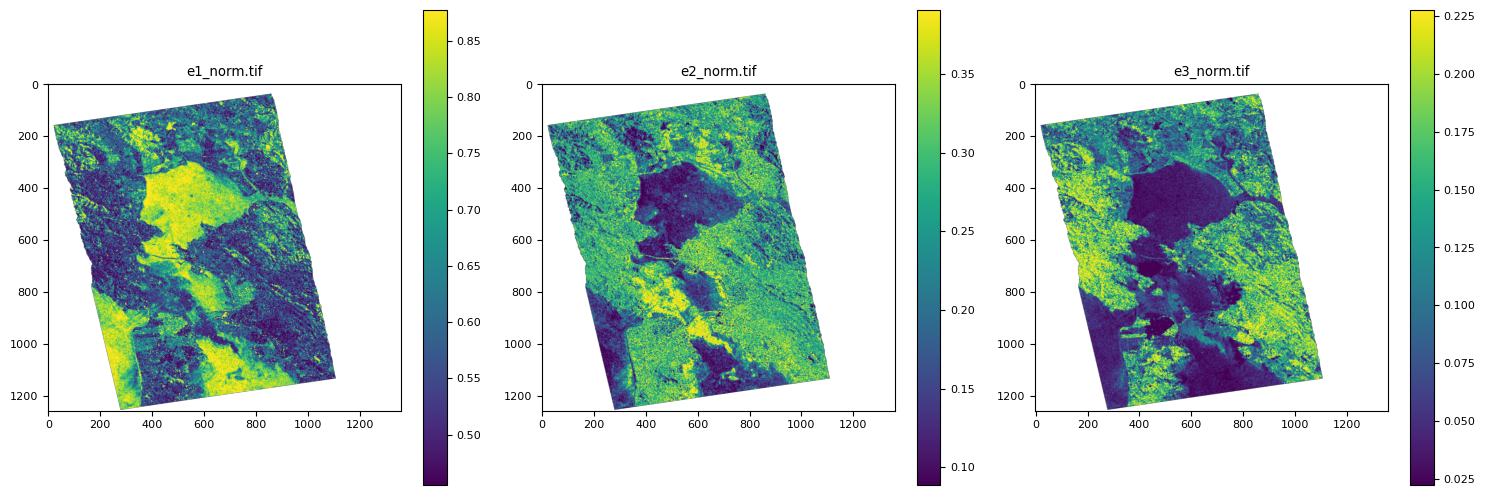

In [6]:

"""
The following function generates H/A/alpha demposition paramters: 
        Alpha, entropy, anisotropy and 
        normalized eigen values e1_norm, e2_norm, e3_norm in geotif format

input C3/T3 folder path, window_size is optional  

"""
# update the C3 folder based on your folder

pst.halphafp(C3Folder,window_size=3) 


### Plotting
plot_images(os.path.join(C3Folder,'H_fp.tif'),
             os.path.join(C3Folder,'anisotropy_fp.tif'),
              os.path.join(C3Folder,'alpha_fp.tif'))

plot_images(os.path.join(C3Folder,'e1_norm.tif'),
             os.path.join(C3Folder,'e2_norm.tif'),
             os.path.join(C3Folder,'e3_norm.tif'))




#### Plot Entropy-Alpha 2D plane

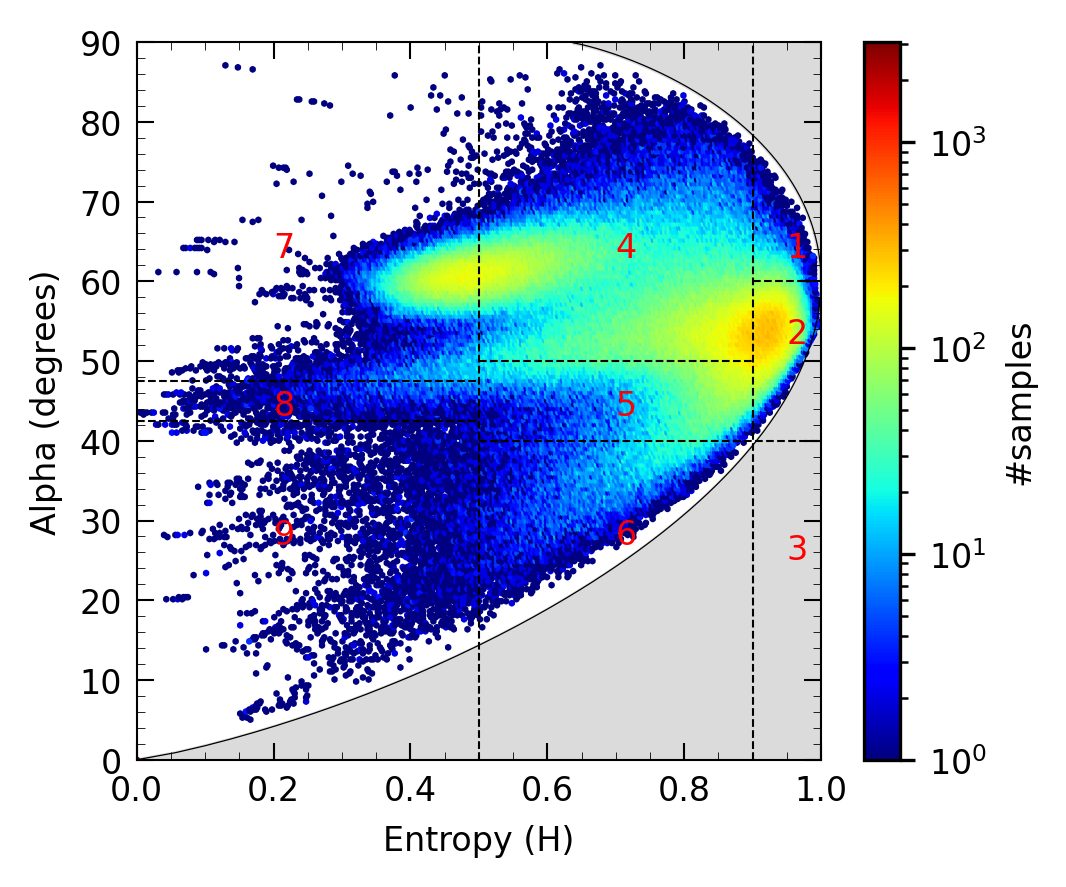

In [7]:
h = pst.utils.read_bin(C3Folder + '/H_fp.tif')
alpha = pst.utils.read_bin(C3Folder + '/alpha_fp.tif')

pst.halpha_plot_fp(h,alpha,cmap='jet',norm='log')

#### 4.2. Generate Yamaguchi 4-Component Decomposition parameters

In [8]:
"""
The following function generates Yamaguchi 4-Component Decomposition parameters: 
        Yam4co_odd, Yam4co_dbl, Yam4co_vol and Yam4co_hlx in geotif format

input C3/T3 folder path, window_size is optional  

"""

pst.yam4cfp(C3Folder,window_size=3) 

Progress : 100%|█████████████████████████████████████████████████████████████████████| 9/9 [00:26<00:00,  2.90s/ block]


Saved file GSLC_QP_rlee_3x3\C3\Yam4co_odd.tif
Saved file GSLC_QP_rlee_3x3\C3\Yam4co_dbl.tif
Saved file GSLC_QP_rlee_3x3\C3\Yam4co_vol.tif
Saved file GSLC_QP_rlee_3x3\C3\Yam4co_hlx.tif
Execution time for yam4cfp: 27.00 seconds


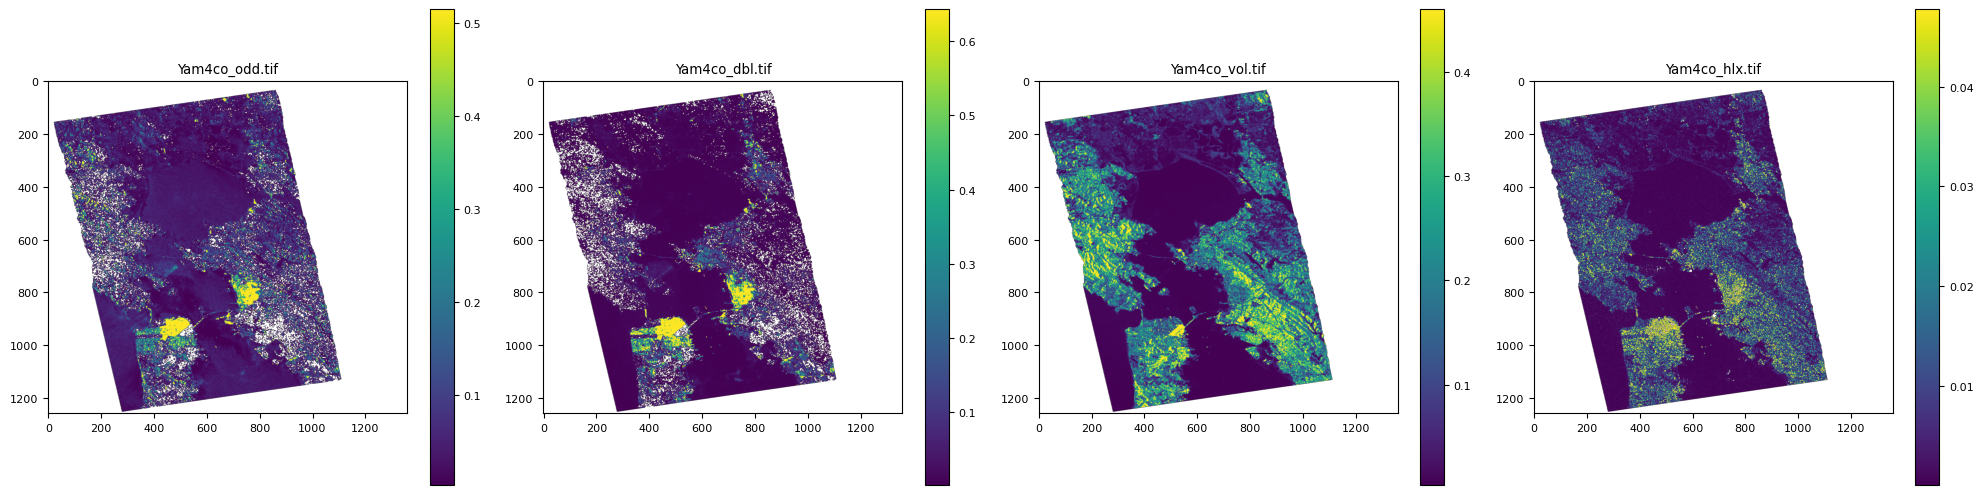

In [9]:
### Plotting
plot_images(os.path.join(C3Folder,'Yam4co_odd.tif'),
            os.path.join(C3Folder,'Yam4co_dbl.tif'),
            os.path.join(C3Folder,'Yam4co_vol.tif'),
            os.path.join(C3Folder,'Yam4co_hlx.tif'),
           )